<font color='darkorange'> Unless otherwise noted, **this notebook will not be reviewed or autograded.**</font> You are welcome to use it for scratchwork, but **only the files listed in the exercises will be checked.**

---

# Exercises

For these exercises, add your functions to the *apputil\.py* file and *app\.py* file as instructed. *These exercises use the same [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) as the lab.*


## Exercise 1: Survival Patterns


For this exercise you will analyze survival patterns on the Titanic by looking at passenger class, sex, and age group. Name the function `survival_demographics()`.

1. Create a new column in the Titanic dataset that classifies passengers into age categories (i.e., a pandas `category` series). The categories should be:
    - Child (up to 12)
    - Teen (13–19)
    - Adult (20–59)
    - Senior (60+)  
  
	Hint: The `pd.cut()` function might come in handy here.

2. Group the passengers by class, sex, and age group.  

3. For each group, calculate:  
    - The total number of passengers, `n_passengers`
    - The number of survivors, `n_survivors`
    - The survival rate, `survival_rate`

4. Return a table that includes the results for *all* combinations of class, sex, and age group.  

5. Order the results so they are easy to interpret.  

6. Come up with a clear question that your results table makes you curious about (e.g., “Did women in first class have a higher survival rate than men in other classes?”). Write this question in your `app.py` file above the call to your visualization function, using `st.write("Your Question Here")`.
   
7. Create a Plotly visualization in a function named `visualize_demographic()` that directly addresses your question by returning a Plotly figure (e.g., `fig = px. ...`). You are free to choose the chart type that you think best communicates the findings. Be creative — try different approaches, compare them, and ensure that your chart clearly answers the question you posed.


In [22]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Loading Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/leontoddjohnson/datasets/main/data/titanic.csv')


In [36]:
# 1) Create a new column in the Titanic dataset that classifies passengers into age categories: 'Child' (0-12), 'Teen' (13-19), 'Adult' (20-59), and 'Senior' (60+)
"""
    Defining age categories using pd.cut
    Using pd.cut to cut the 'age column into bins and creating a new column 'age_group' by adding labels to the bins

    age bins = [0, 12, 19, 59, np.inf]
    labels = ['Child', 'Teen', 'Adult', 'Senior']
    """
df['Age_group'] = pd.cut(df['Age'], bins=[0, 12, 19, 59, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])

# 2) Group the passengers by class, sex, and age group
"""
    Use groupby to group the passengers
"""
grouped = df.groupby(['Pclass', 'Sex', 'Age_group'])

# 3) For each group, calculate the total number of passengers, survivors, and the survival rate
"""
    Using agg to aggregate the grouped data
    Calculating total passengers(n_passengers), survivors(n_survivors), and survival rate(survival_rate)
"""
summary = grouped.agg(
    n_passengers=('Survived', 'count'),
    n_survivors=('Survived', 'sum')
).reset_index()
summary['survival_rate'] = summary['n_survivors'] / summary['n_passengers']

# 4) Return a table that includes the results for all combinations of class, sex, and age group
"""
    Displaying the summary table
"""
print(summary)


    Pclass     Sex Age_group  n_passengers  n_survivors  survival_rate
0        1  female     Child             1            0       0.000000
1        1  female      Teen            13           13       1.000000
2        1  female     Adult            68           66       0.970588
3        1  female    Senior             3            3       1.000000
4        1    male     Child             3            3       1.000000
5        1    male      Teen             4            1       0.250000
6        1    male     Adult            80           34       0.425000
7        1    male    Senior            14            2       0.142857
8        2  female     Child             8            8       1.000000
9        2  female      Teen             8            8       1.000000
10       2  female     Adult            58           52       0.896552
11       2  female    Senior             0            0            NaN
12       2    male     Child             9            9       1.000000
13    

/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_6656/3019143467.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [47]:
summary = summary.sort_values(by=['Pclass']).reset_index(drop=True)
print(summary)

    Pclass     Sex Age_group  n_passengers  n_survivors  survival_rate
0        1  female     Child             1            0       0.000000
1        1    male     Child             3            3       1.000000
2        1  female    Senior             3            3       1.000000
3        1    male      Teen             4            1       0.250000
4        1  female      Teen            13           13       1.000000
5        1    male     Adult            80           34       0.425000
6        1  female     Adult            68           66       0.970588
7        1    male    Senior            14            2       0.142857
8        2    male     Child             9            9       1.000000
9        2    male      Teen            10            1       0.100000
10       2    male    Senior             4            1       0.250000
11       2    male     Adult            76            4       0.052632
12       2  female     Adult            58           52       0.896552
13    

In [46]:
summary = summary.sort_values(by=['Sex']).reset_index(drop=True)
print(summary)

    Pclass     Sex Age_group  n_passengers  n_survivors  survival_rate
0        1  female     Child             1            0       0.000000
1        2  female     Child             8            8       1.000000
2        1  female    Senior             3            3       1.000000
3        3  female     Child            23           11       0.478261
4        3  female    Senior             1            1       1.000000
5        2  female    Senior             0            0            NaN
6        1  female      Teen            13           13       1.000000
7        2  female      Teen             8            8       1.000000
8        3  female      Teen            22           13       0.590909
9        1  female     Adult            68           66       0.970588
10       3  female     Adult            56           22       0.392857
11       2  female     Adult            58           52       0.896552
12       1    male    Senior            14            2       0.142857
13    

In [45]:
# 5) Order the results so they are easy to interpret
summary = summary.sort_values(by=['Age_group']).reset_index(drop=True)
print(summary)

    Pclass     Sex Age_group  n_passengers  n_survivors  survival_rate
0        1  female     Child             1            0       0.000000
1        2  female     Child             8            8       1.000000
2        1    male     Child             3            3       1.000000
3        3  female     Child            23           11       0.478261
4        2    male     Child             9            9       1.000000
5        3    male     Child            25            9       0.360000
6        1  female      Teen            13           13       1.000000
7        2  female      Teen             8            8       1.000000
8        3  female      Teen            22           13       0.590909
9        1    male      Teen             4            1       0.250000
10       2    male      Teen            10            1       0.100000
11       3    male      Teen            38            3       0.078947
12       1    male     Adult            80           34       0.425000
13    

<Axes: xlabel='Age_group', ylabel='survival_rate'>

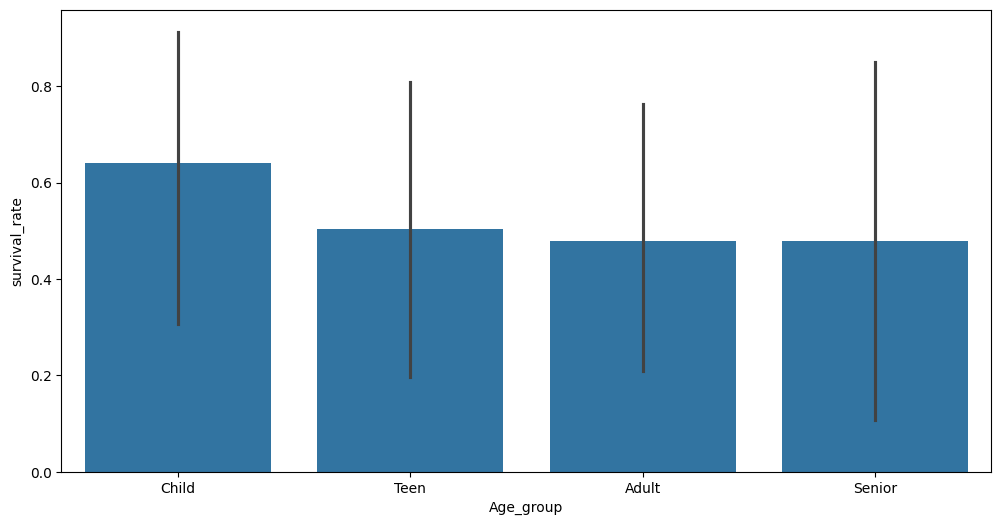

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Age_group', y='survival_rate')

## Exercise 2: Family Size and Wealth

Using the Titanic dataset, write a function named `family_groups()` to explore the relationship between family size, passenger class, and ticket fare.  

1. Create a new column in the Titanic dataset that represents the total family size for each passenger, `family_size`. Family size is defined as the number of siblings/spouses aboard plus the number of parents/children aboard, plus the passenger themselves.

2. Group the passengers by family size and passenger class. For each group, calculate:  
   - The total number of passengers, `n_passengers`
   - The average ticket fare, `avg_fare`
   - The minimum and maximum ticket fares (to capture variation in wealth), `min_fare` and `max_fare`

3. Return a table with these results, sorted so that the values are clear and easy to interpret (for example, by class and then family size).

4. Write a function called `last_names()` that extracts the last name of each passenger from the `Name` column, and returns the count for each last name (i.e., a pandas series with last name as index, and count as value). Does this result agree with that of the data table above? Share your findings in your app using `st.write`.

5. Just like you did in Exercise 1, come up with a clear question that your results makes you curious about. Write this question in your app.py file above the call to your visualization function. Then, create a Plotly visualization in a function named `visualize_families()` that directly addresses your question. As in Exercise 1 you are free to choose the chart type that you think best communicates the findings.

## Bonus Question

Add a new column, `older_passenger`, to the Titanic dataset that indicates whether each passenger’s age is above the median age for *their* passenger class. So, suppose row $x$ is in passenger class 2. Then, a value of `True` at row $x$ would indicate that passenger older than 50% of class 2 passengers, and `False` would indicate that they younger.

- You should use pandas functions to accomplish this.
- The new column should contain Boolean values (True if the age is above the median, False if less than or equal to).
- Return the updated table in the function `determine_age_division()`

Once you’ve created this column, consider how this age division relates to your analysis above. Try to visualize this analysis in Plotly using the function name `visualize_age_division()`.